In [1]:
# standard packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# local package dependencies
import os
import sys
sys.path.append(os.path.abspath("../../scripts/"))
from impact_vectors import create_impact_pool

# Load the impact metrics

In [2]:
df = pd.read_csv("data/arb-impact-metrics.csv",index_col=0)
df.drop(columns=['project_id_1'], inplace=True)
df['retained_users'] = df['active_users'] / df['total_users']
df['avg_parttime_devs_6_months'] = df['avg_active_devs_6_months'] - df['avg_fulltime_devs_6_months']
df['l2_gas_6_months'] = df['l2_gas_6_months']
df['total_l2_gas'] = df['total_l2_gas']
df.shape

(357, 32)

In [3]:
df.loc['XSDgPwFuQVcj57ARcKTGrm2w80KKlqJxaBWF6jZqe7w='].T

project_name                                            Uniswap
first_commit_date                2018-03-07 21:59:23.000000 UTC
last_commit_date                 2024-02-27 04:25:00.000000 UTC
repos                                                      58.0
stars                                                   26540.0
forks                                                   24545.0
contributors                                             1061.0
contributors_6_months                                     123.0
new_contributors_6_months                                  69.0
avg_fulltime_devs_6_months                                  3.0
avg_active_devs_6_months                              19.666667
commits_6_months                                          650.0
issues_opened_6_months                                    468.0
issues_closed_6_months                                    110.0
pull_requests_opened_6_months                             972.0
pull_requests_merged_6_months           

# Configure the impact pools

In [4]:
DATE_FILTER = '2023-09-01'

In [5]:
users_pool = create_impact_pool(
    df[df['first_txn_date'] < DATE_FILTER],
    impact_vectors={
        'active_users': ('log', .5),
        'multi_project_users': ('log', .25),
        'retained_users': ('linear', .25)
    }
)
users_pool

,project_name,active_users,multi_project_users,retained_users,wtd_active_users,wtd_multi_project_users,wtd_retained_users,pool_score
project_id,,,,,,,,
GVboljZKY6m9JBjDCnrT0lUfAe28t1W5UFNJRIH-xfY=,Rabbithole,73791.0,43816.0,0.901793,0.431164,0.237739,0.225727,0.894630
LNQR7by2d4x_GcRrl47_US9ZJ1j12JkObQoxSG6oUlM=,Wormhole,58166.0,31282.0,0.801681,0.422012,0.235189,0.200665,0.857866
uYLjQ55HRs_nAw4G3VwtNhdWBf5QfNb28fpeL7Dtlfs=,MesonFi,33756.0,14368.0,0.781896,0.401081,0.229300,0.195712,0.826093
dvlsTs_2ZWRSP736c4WgxvqL1dw3iYyc041mToDh0ZI=,Abacus,9272.0,6900.0,0.969570,0.351377,0.223749,0.242694,0.817820
57ErQ5loSD9BlgJCB1nUOKthiQC6uxZ6ZESdKngaphM=,Rainbow,15379.0,7854.0,0.843239,0.370841,0.224729,0.211069,0.806638
...,...,...,...,...,...,...,...,...
rndo3OWsbYMRKdt6O8b0YOlzhT9u_vM1SeF5qjVd3pI=,Tracer,4.0,2.0,0.000670,0.053325,0.162094,0.000139,0.215558
r7_33tnNGxObVydpbCH_zU3QwW0L02uu5ZOsXpZ3V4Q=,Adrastia Oracle,7.0,0.0,0.437500,0.074851,0.000000,0.109496,0.184347
KEEBnsnsYBPgW5YvPDLHWm08v6YnPGXVnSJIxblxT6M=,Pickle Finance,1.0,1.0,0.025000,0.000000,0.156847,0.006230,0.163078


In [6]:
dev_growth_pool = create_impact_pool(
    df[df['first_commit_date'] < DATE_FILTER],
    impact_vectors={
        'avg_fulltime_devs_6_months': ('log', .5),
        'avg_parttime_devs_6_months': ('log', .2),        
        'new_contributors_6_months': ('log', .3)
    }
)
dev_growth_pool.head(20)

,project_name,avg_fulltime_devs_6_months,avg_parttime_devs_6_months,new_contributors_6_months,wtd_avg_fulltime_devs_6_months,wtd_avg_parttime_devs_6_months,wtd_new_contributors_6_months,pool_score
project_id,,,,,,,,
LOZXloZfVxGx7h5Na3R-5RcR86-mMDDJuKiE4q_hJOY=,Metamask,22.833333,62.333333,248.0,0.500000,0.200000,0.290050,0.990050
6lg5zQJ4GYDjvO5NvVAfPBWuxNgOeEcLAfcL01ws5Us=,DefiLlama,8.666667,2.000000,610.0,0.479692,0.172326,0.300000,0.952018
HW-DsDcsApBwqtMlSu8S7BpNvtLdq5jvBrJD7kxz7pM=,Safe,9.500000,10.500000,76.0,0.481617,0.185668,0.276975,0.944260
LNQR7by2d4x_GcRrl47_US9ZJ1j12JkObQoxSG6oUlM=,Wormhole,9.166667,17.000000,54.0,0.480868,0.189545,0.273197,0.943611
gHO2CKahfi2EMVYX6Q5B6ZvLcbnTaNrCwk1lniDsEDM=,ThirdWeb,11.666667,11.333333,45.0,0.485924,0.186283,0.271182,0.943388
QltZuORSeUv2rFJ2ue2dvqFPlQ6hjG5OKG35dgDq0aM=,Axelar,6.833333,13.500000,38.0,0.474710,0.187691,0.269312,0.931713
SNdMHnnes04aSQQwpNdWT0uBt6VdKyT3Zog7miIsaK0=,Gitcoin,9.000000,8.166667,23.0,0.480483,0.183646,0.263762,0.927891
XyKL4912vsx41aNjTJDLDexSgi4_BcPkilZ8twJlqxI=,Aave,7.833333,8.833333,21.0,0.477573,0.184278,0.262756,0.924607
XSDgPwFuQVcj57ARcKTGrm2w80KKlqJxaBWF6jZqe7w=,Uniswap,3.000000,16.666667,69.0,0.457453,0.189386,0.275907,0.922746


In [7]:
blockspace_pool = create_impact_pool(
    df[df['first_txn_date'] < DATE_FILTER],
    impact_vectors={
        'l2_gas_6_months': ('log', .5),
        'txns_6_months': ('log', .5)
    }
)
blockspace_pool

,project_name,l2_gas_6_months,txns_6_months,wtd_l2_gas_6_months,wtd_txns_6_months,pool_score
project_id,,,,,,
GVboljZKY6m9JBjDCnrT0lUfAe28t1W5UFNJRIH-xfY=,Rabbithole,1.152984e+13,11807069.0,0.498247,0.500000,0.998247
XSDgPwFuQVcj57ARcKTGrm2w80KKlqJxaBWF6jZqe7w=,Uniswap,1.218750e+13,8427926.0,0.500000,0.488899,0.988899
UF36qYsUzfwX6GDNuWgpDXrqsmrLcK4Rw5D4hZY5Pxc=,LayerZero,9.275698e+12,6546940.0,0.491373,0.480584,0.971956
SV5kdZqv7HuVnB0A9hgFHPi3lubBZ0Tiu0zZS-XMZ-A=,Paraswap,1.080878e+13,4358051.0,0.496206,0.467184,0.963390
EhPGap_lKavTMqT2DUdCSDKsQaAiG99v0Rq__pINhMM=,1Inch,4.662134e+12,2684022.0,0.469634,0.451224,0.920858
...,...,...,...,...,...,...
ECA2N0OFntTQAbcGGw4O_cP0K7iJq0lD0ckVLy37clo=,arbirise,7.910116e+06,12.0,0.049764,0.045645,0.095409
_O6icpTIi-hMqVLPOGuC8PzIBPG-1aaSdXAuTaJ1-2I=,NEON Protocol,4.736584e+06,10.0,0.033559,0.039642,0.073201
ea_hnpeXP8aieOE_713zCTzq0oCW3O46B1RRx0uNgqw=,Stake DAO,4.558282e+06,4.0,0.032346,0.009472,0.041819


In [8]:
momentum_pool = create_impact_pool(
    df[df['first_txn_date'] < DATE_FILTER],
    impact_vectors={
        'active_users': ('log', 1/3),
        'avg_active_devs_6_months': ('log', 1/6),        
        'commits_6_months': ('log', 1/3),        
        'issues_closed_6_months': ('log', 1/6)
    }   
)
momentum_pool.head(20)

,project_name,active_users,avg_active_devs_6_months,commits_6_months,issues_closed_6_months,wtd_active_users,wtd_avg_active_devs_6_months,wtd_commits_6_months,wtd_issues_closed_6_months,pool_score
project_id,,,,,,,,,,
LOZXloZfVxGx7h5Na3R-5RcR86-mMDDJuKiE4q_hJOY=,Metamask,102907.0,85.166667,17136.0,3247.0,0.295972,0.166667,0.333333,0.166667,0.962638
LNQR7by2d4x_GcRrl47_US9ZJ1j12JkObQoxSG6oUlM=,Wormhole,58166.0,26.166667,2610.0,987.0,0.281341,0.158852,0.268990,0.142120,0.851303
QltZuORSeUv2rFJ2ue2dvqFPlQ6hjG5OKG35dgDq0aM=,Axelar,36009.0,20.333333,3001.0,231.0,0.269044,0.157181,0.273763,0.112185,0.812174
HW-DsDcsApBwqtMlSu8S7BpNvtLdq5jvBrJD7kxz7pM=,Safe,3094.0,20.000000,4885.0,988.0,0.206106,0.157072,0.290422,0.142141,0.795741
XSDgPwFuQVcj57ARcKTGrm2w80KKlqJxaBWF6jZqe7w=,Uniswap,258476.0,19.666667,650.0,110.0,0.319589,0.156961,0.221459,0.096891,0.794900
XyKL4912vsx41aNjTJDLDexSgi4_BcPkilZ8twJlqxI=,Aave,21051.0,16.666667,4837.0,69.0,0.255278,0.155865,0.290085,0.087278,0.788505
EhPGap_lKavTMqT2DUdCSDKsQaAiG99v0Rq__pINhMM=,1Inch,108734.0,9.166667,961.0,30.0,0.297384,0.151906,0.234828,0.070109,0.754227
57ErQ5loSD9BlgJCB1nUOKthiQC6uxZ6ZESdKngaphM=,Rainbow,15379.0,12.666667,1148.0,122.0,0.247227,0.154047,0.240908,0.099026,0.741207
lTrJShA8bLeyWUn-DHIuT_7591FZ7PXqXscO6gVX4N0=,Connext,7839.0,7.666667,861.0,483.0,0.229946,0.150722,0.231071,0.127389,0.739128


# Visualize each of the pools

In [9]:
N = 50

def render_pool(pool_dataframe, pool_name):

    pool = (
        pool_dataframe
        .copy()
        .dropna()
        .head(N)
        .iloc[::-1]
    )
    scaled_values = [c for c in pool.columns if 'wtd' in c]
    true_values = [c.replace('wtd_','') for c in scaled_values]
    ylabels = pool['project_name']
    num_cols = len(scaled_values)

    tick_params = dict(axis='both', which='both', labelbottom=False, bottom=False, left=False)
    fig, axes = plt.subplots(
        figsize=(12,10), 
        ncols=num_cols+1, 
        dpi=300, 
        facecolor='white'
    )

    def make_plot(idx, vec, label):
        ax = axes[idx]
        ax.scatter(
            x=pool[vec], 
            y=ylabels, 
            c=pool[vec], 
            cmap='viridis_r', 
            lw=1, 
            edgecolor='black', 
            zorder=2
        )
        ax.text(
            s=label,             
            x=pool[vec].min(), 
            y=N,
            ha='left', 
            weight='bold', 
            fontsize=8
        )
        ylabel = "|\nMax\n"
        if idx < num_cols:
            ylabel += f"{pool_dataframe[true_values[idx]].max():,.0f}"
        else:
            ylabel += "(normalized score)"
        ax.text(
            s=ylabel,
            x=pool[vec].max(), 
            y=0.5,
            ha='right',
            va='top',
            fontsize=8                
        )

        ax.grid(axis='y')
        ax.set_ylim(-1,N)
        ax.spines['left'].set_visible(False)
        ax.set_frame_on(False)
        if i:
            ax.tick_params(**tick_params, labelleft=False)
        else:
            ax.tick_params(**tick_params)
            ax.set_title(f"{pool_name}\n", loc='left', weight='bold')

    for (i,v) in enumerate(scaled_values):
        make_plot(i, v, true_values[i])
    
    make_plot(num_cols, 'pool_score', 'pool_score') 

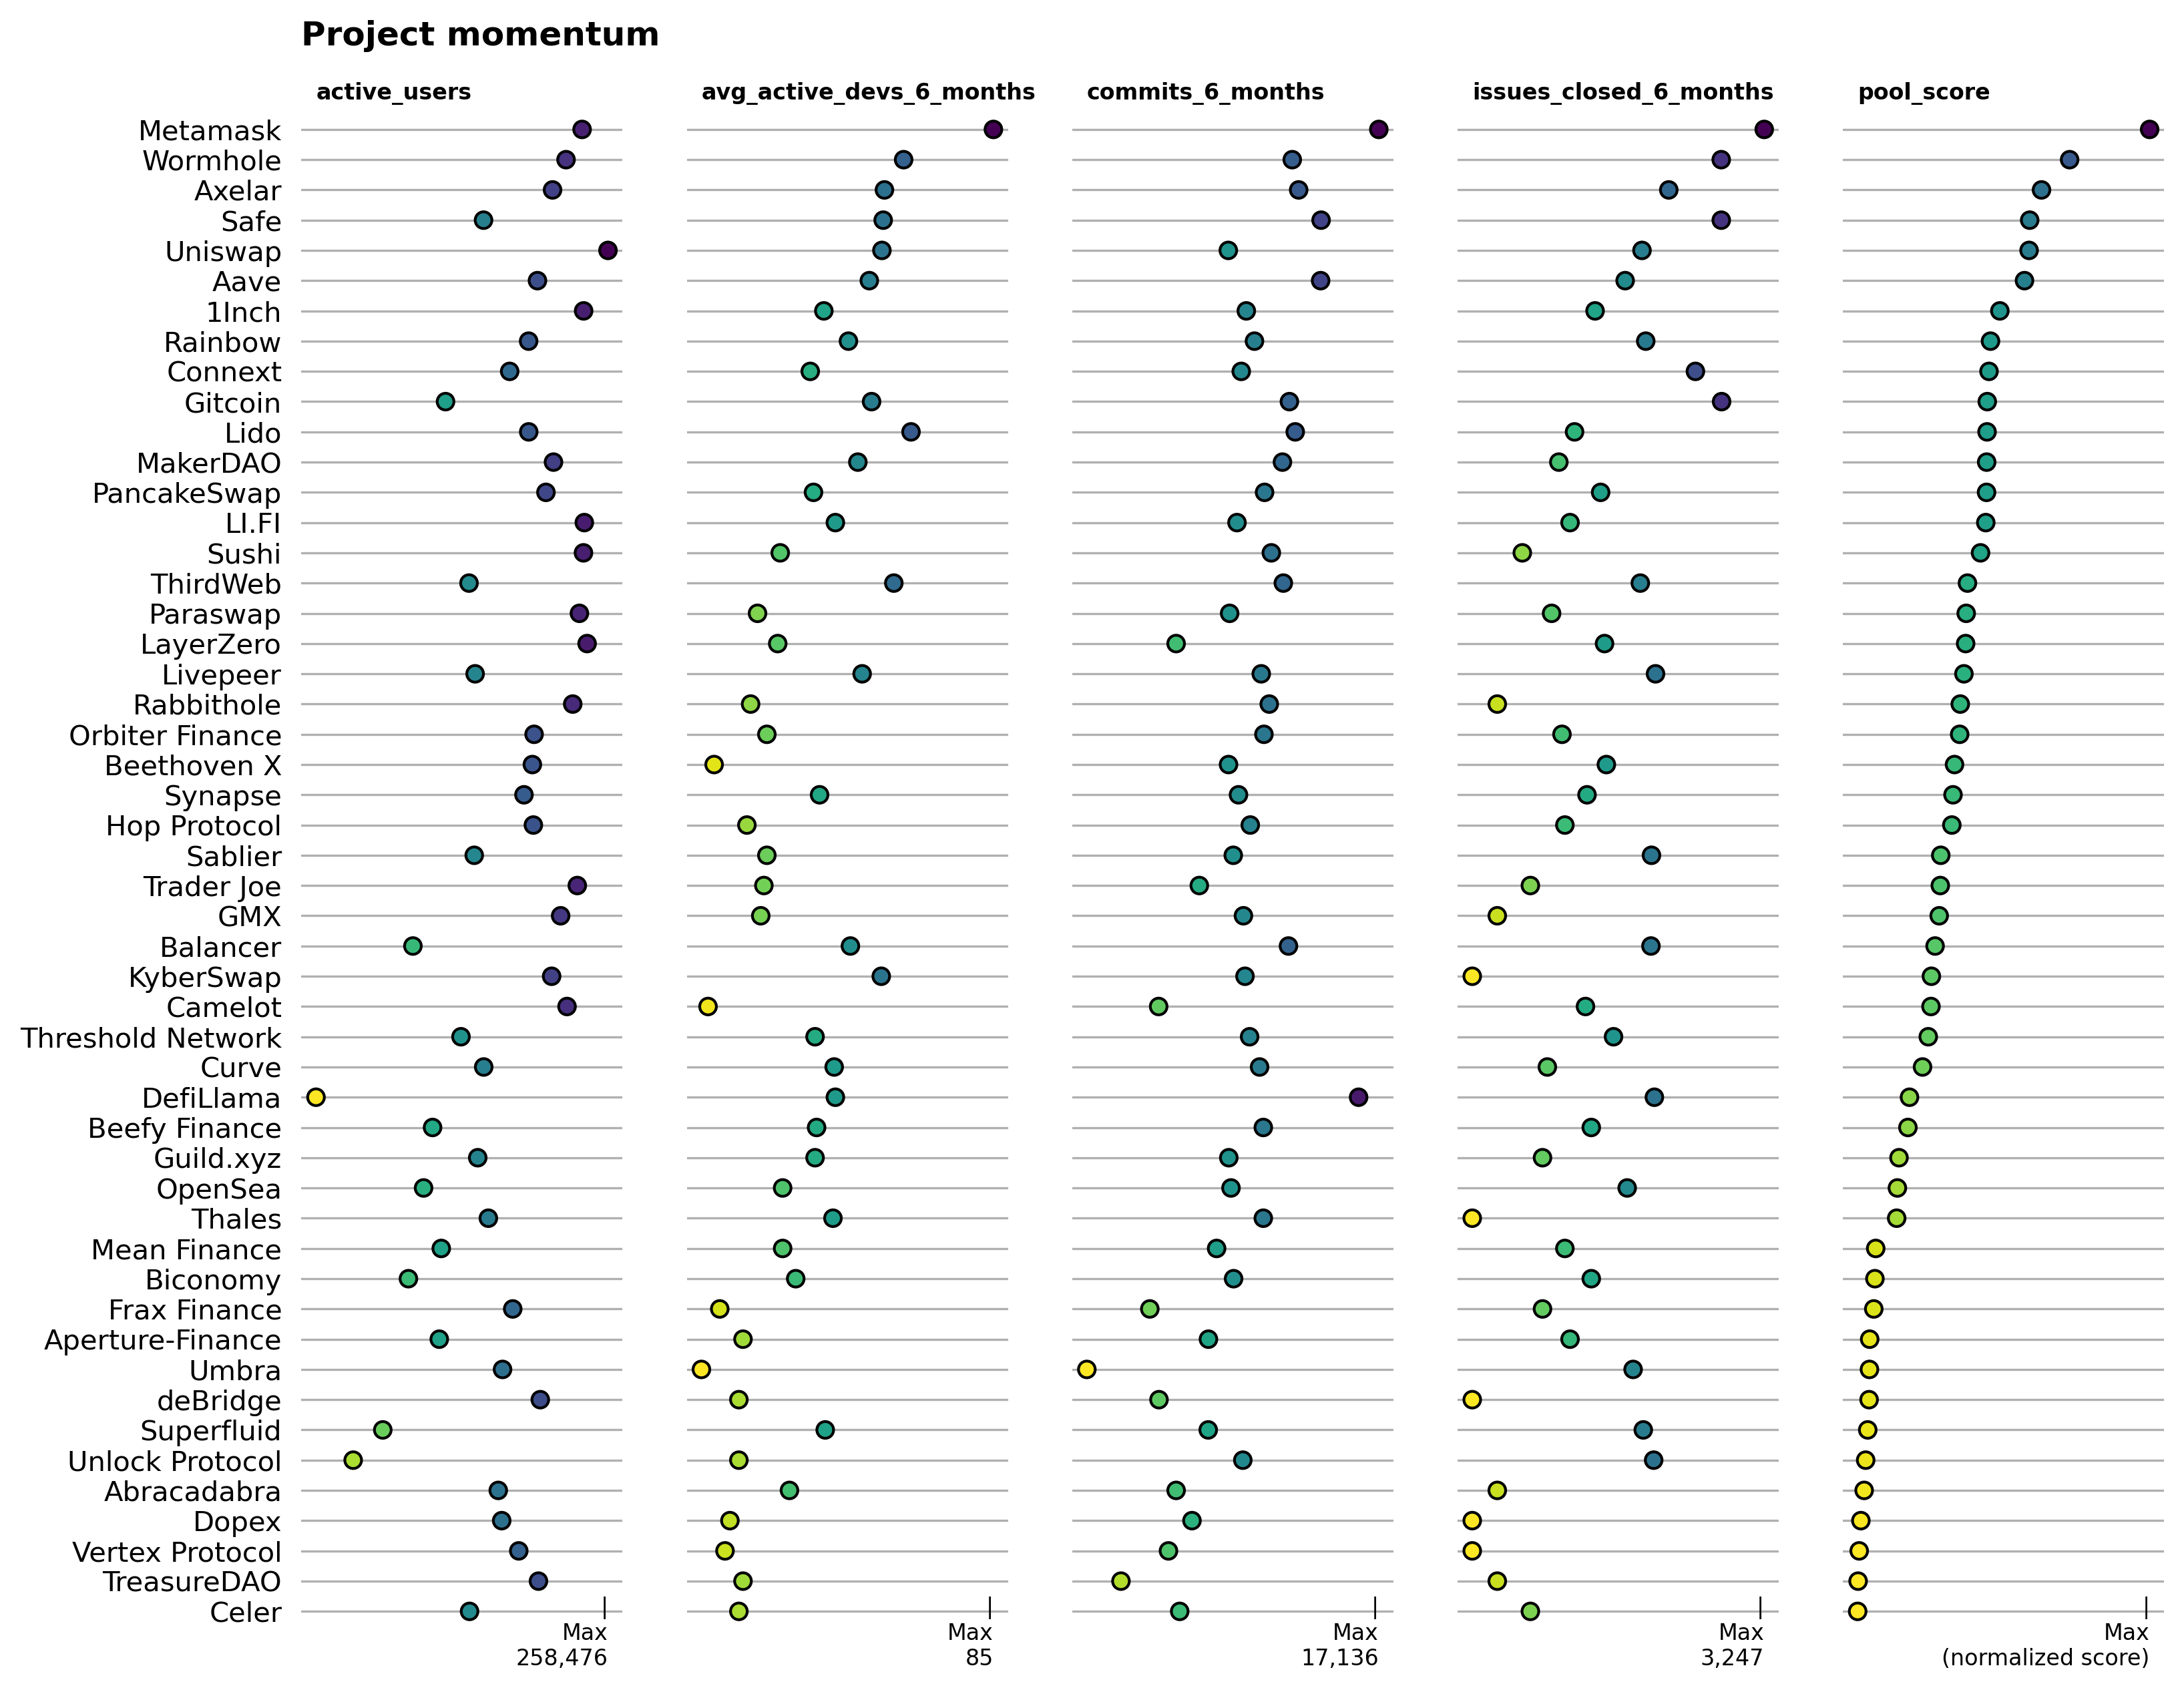

In [10]:
render_pool(momentum_pool, "Project momentum")

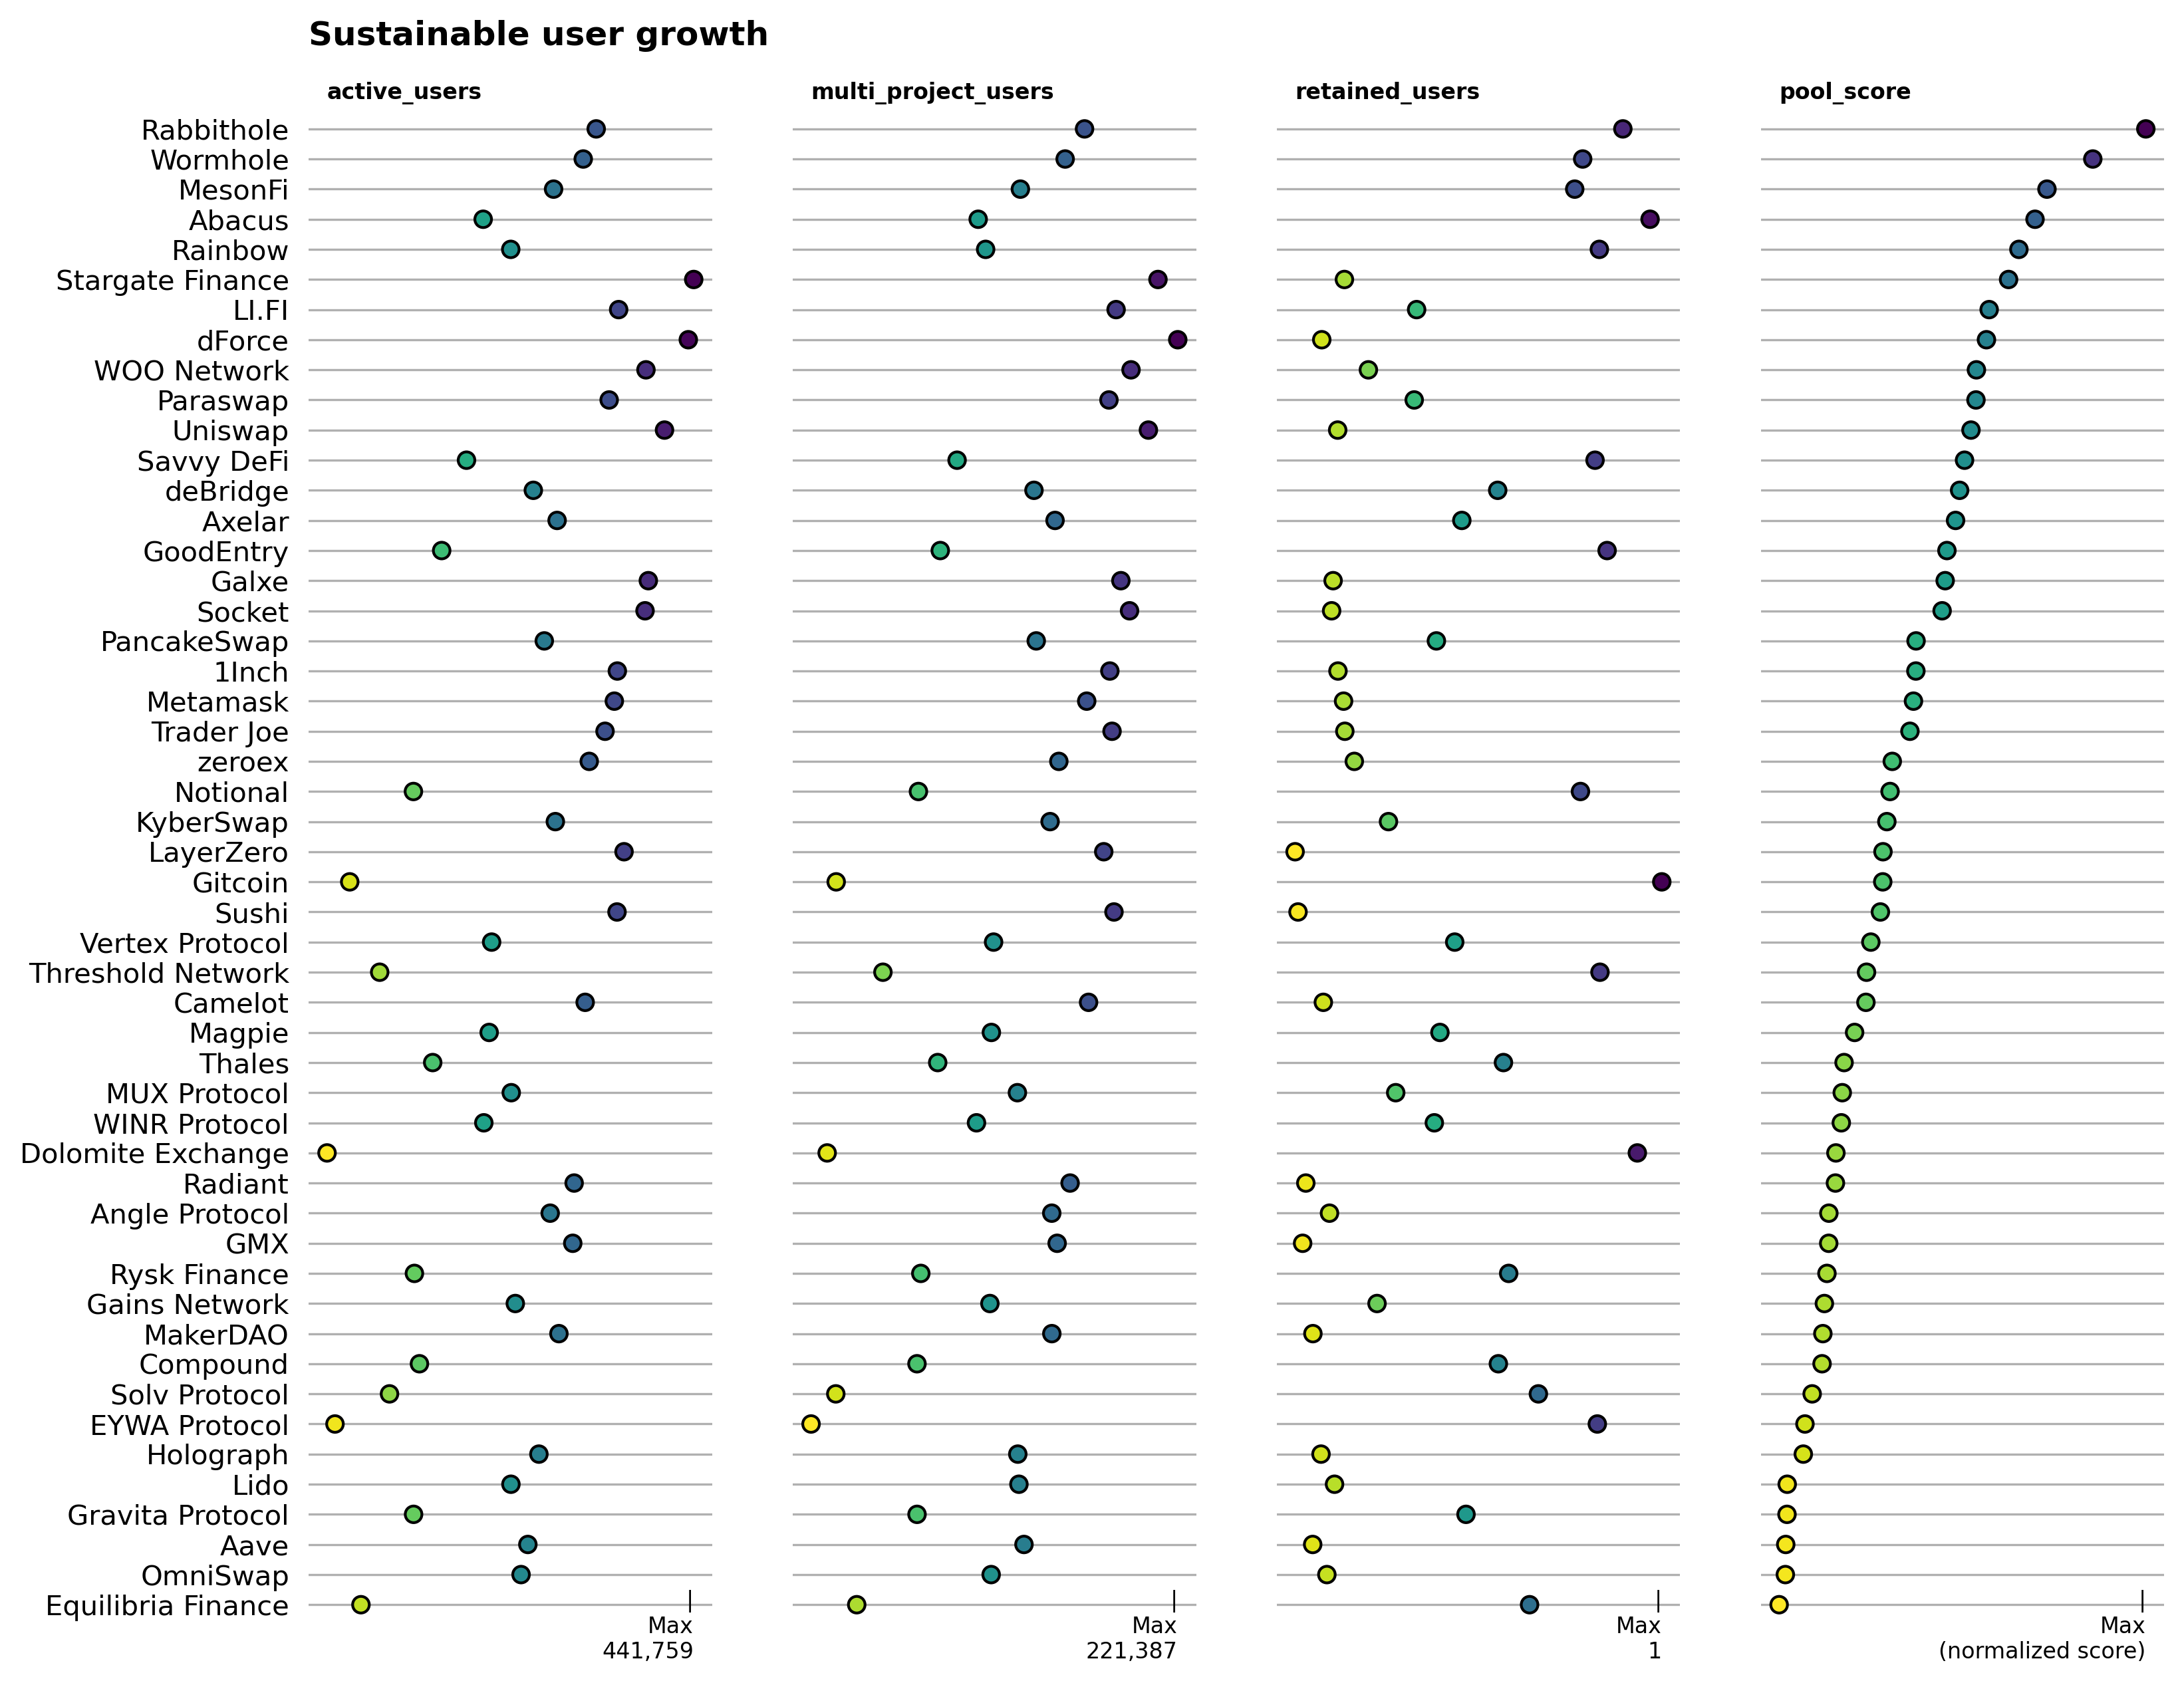

In [11]:
render_pool(users_pool, "Sustainable user growth")

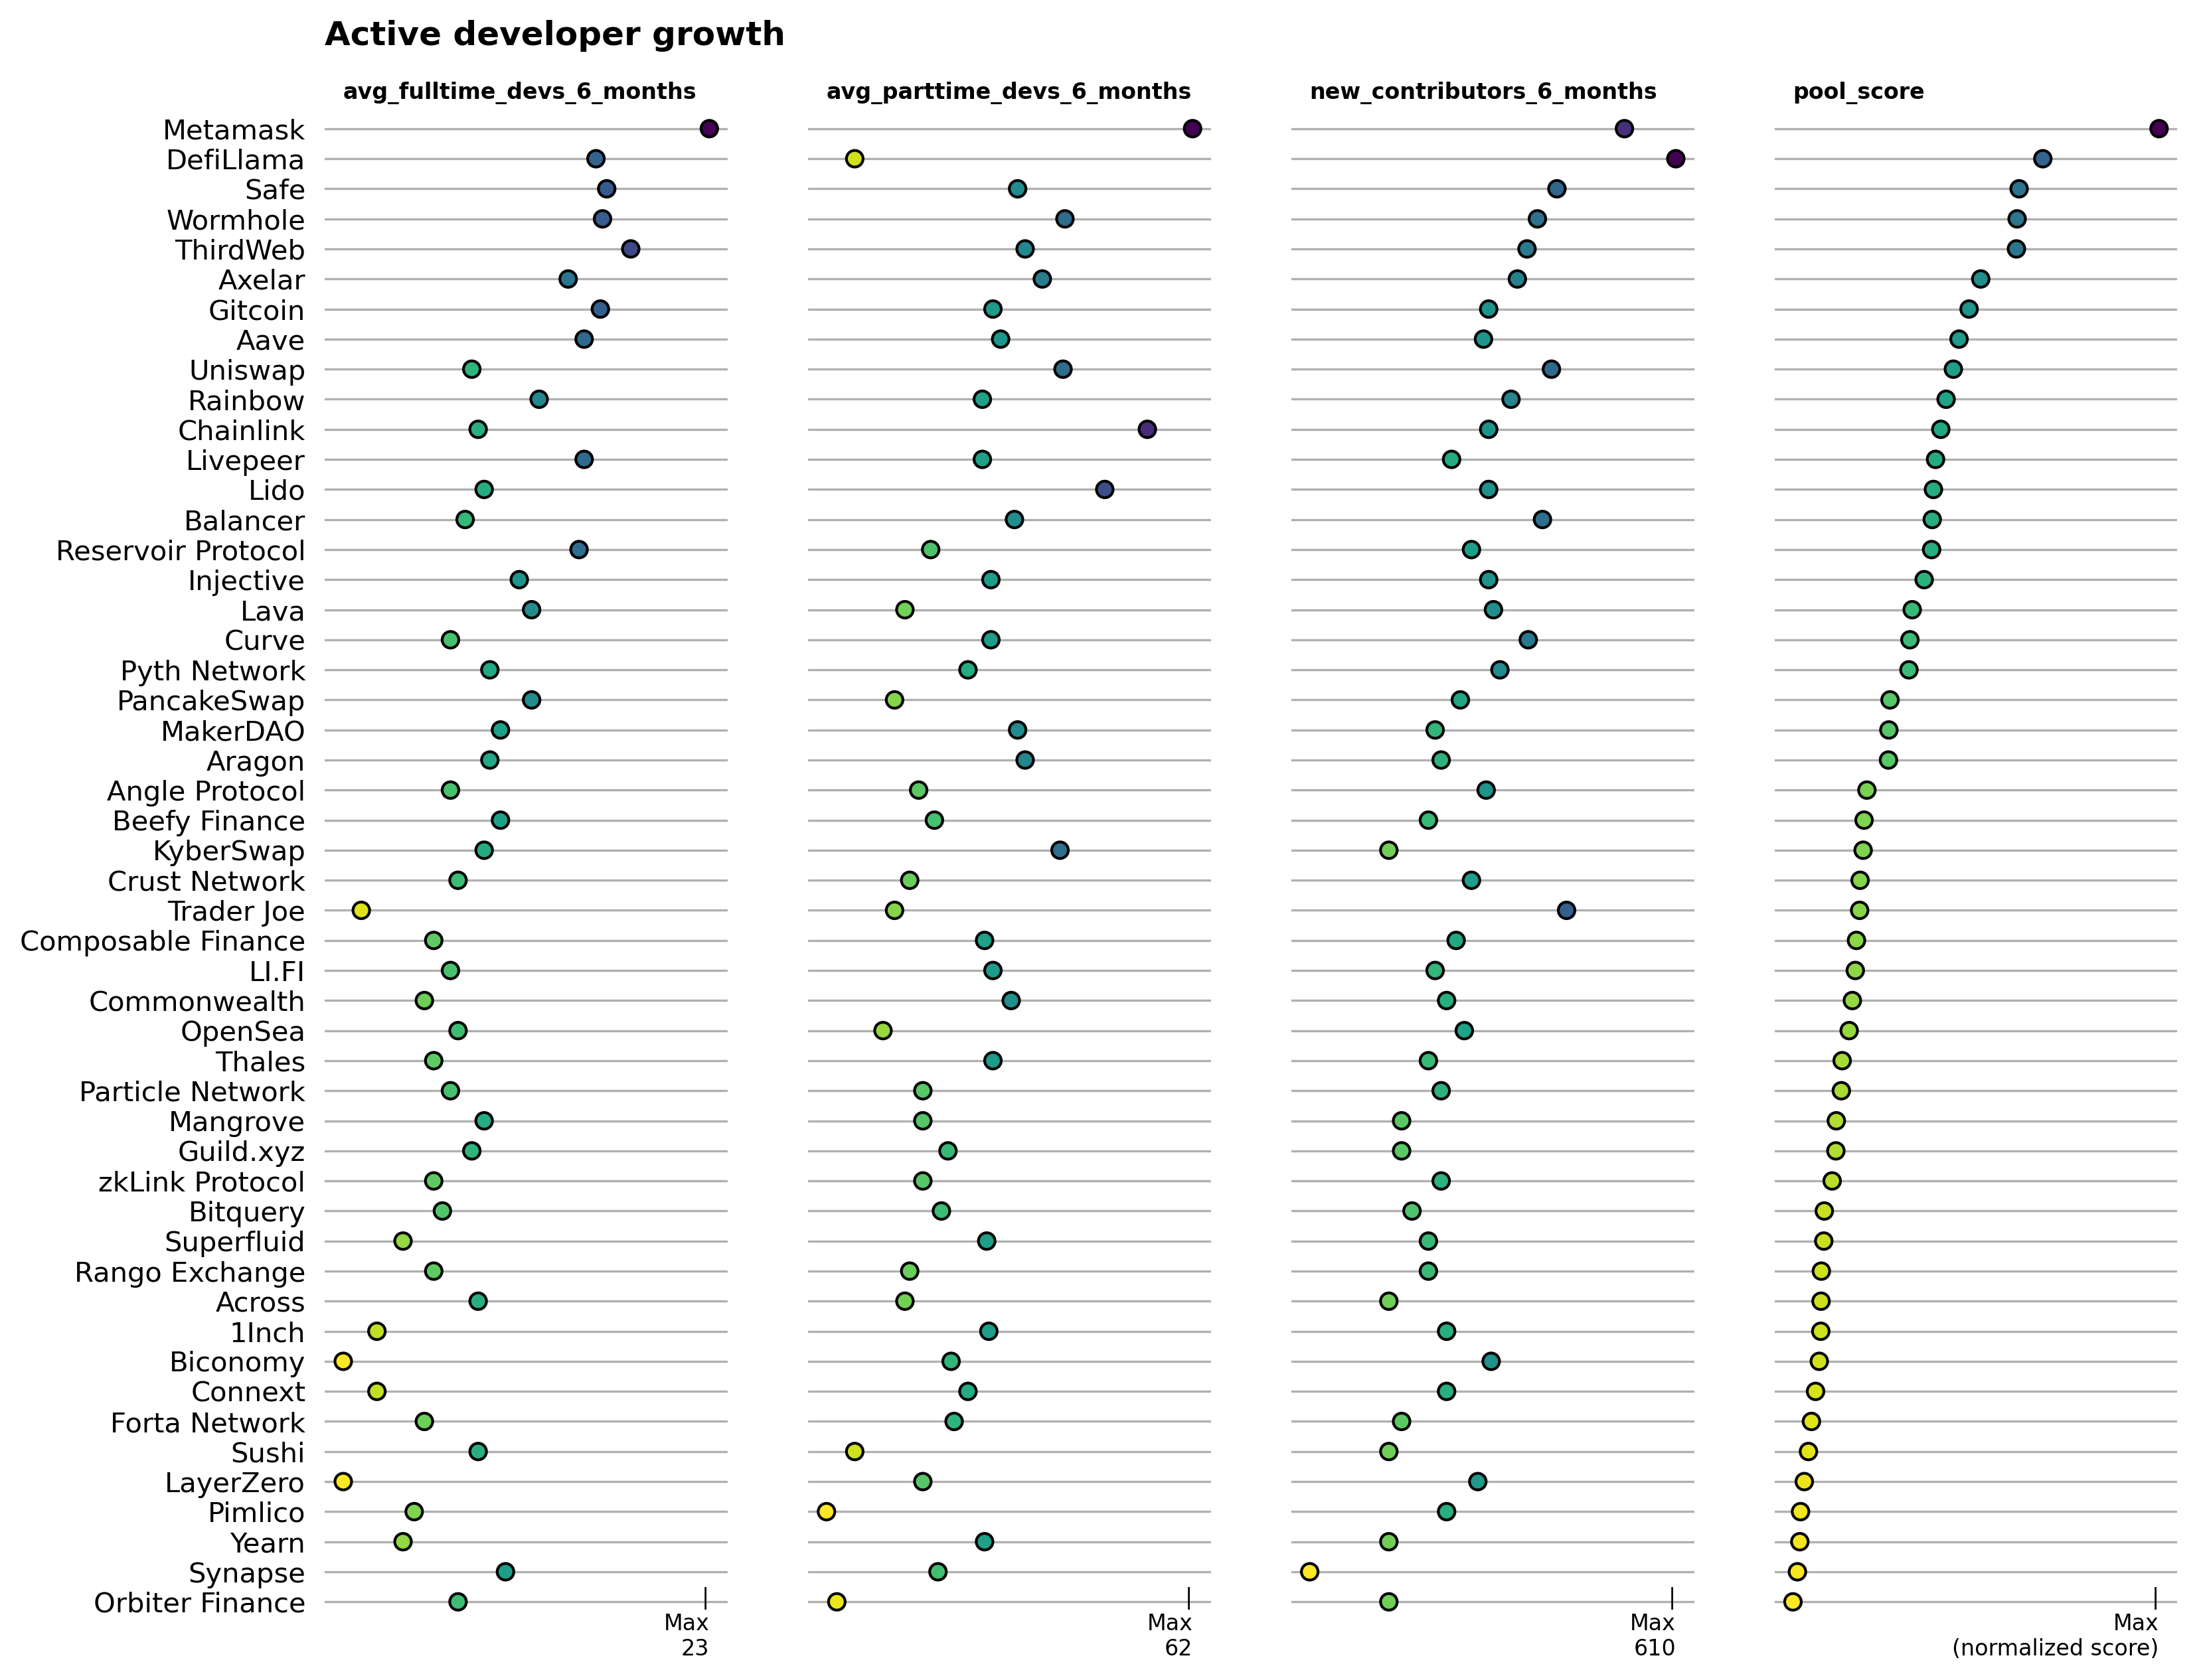

In [12]:
render_pool(dev_growth_pool, "Active developer growth")

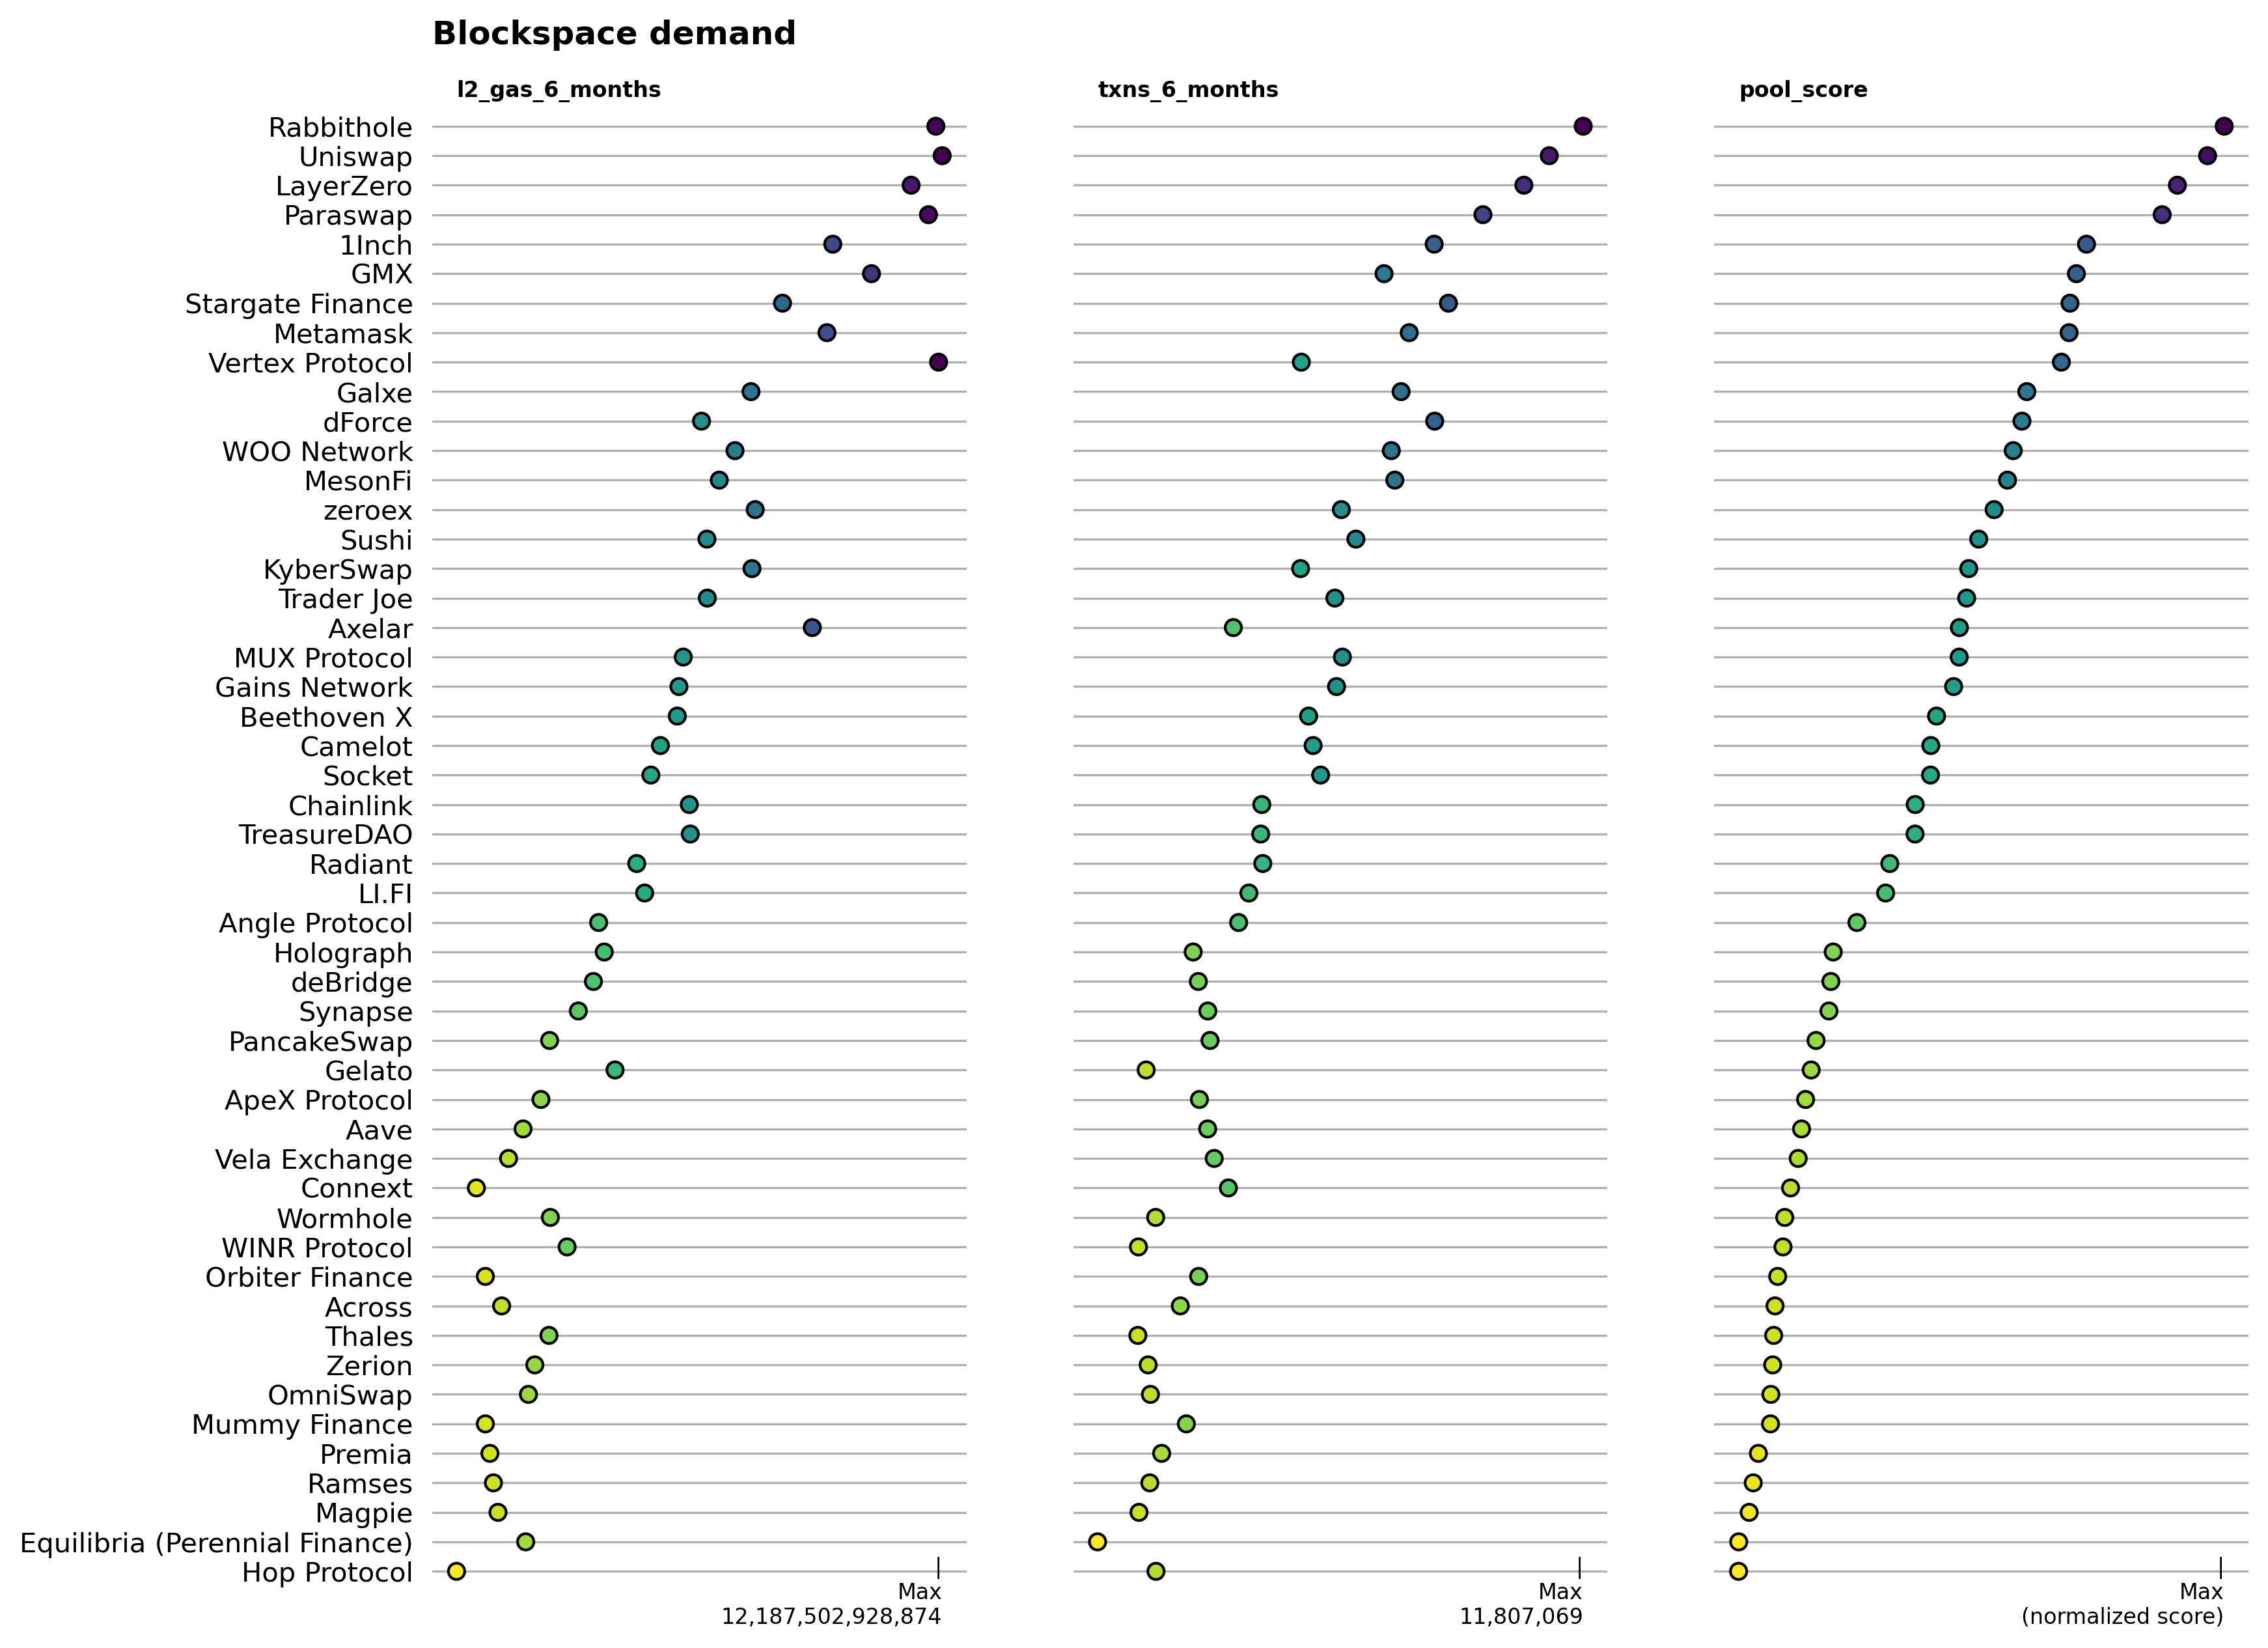

In [13]:
render_pool(blockspace_pool, "Blockspace demand")

# Additional visualizations

In [14]:
def scatterplot(dataframe, x, y, size, title, cap=8, logs=['x','y']):
    
    fig, ax = plt.subplots(figsize=(5,5), facecolor='white', dpi=300)
    
    sns.scatterplot(
        data=dataframe,
        x=x,
        y=y,
        size=size,
        color=['blue' if i < cap else 'grey' for i in range(len(dataframe))],
        ax=ax,
        alpha=.5,
        lw=1,
        edgecolor='black',
        legend=False
    )
    if 'x' in logs:
        ax.set_xscale('log')
    if 'y' in logs:
        ax.set_yscale('log')
    for _, row in dataframe.head(cap).iterrows():
        ax.text(
            s=row['project_name'], 
            x=row[x], 
            y=row[y], 
            ha='center', 
            va='bottom', 
            fontsize=6
        )
    ax.set_title(title, loc='left', fontsize=8, weight='bold')

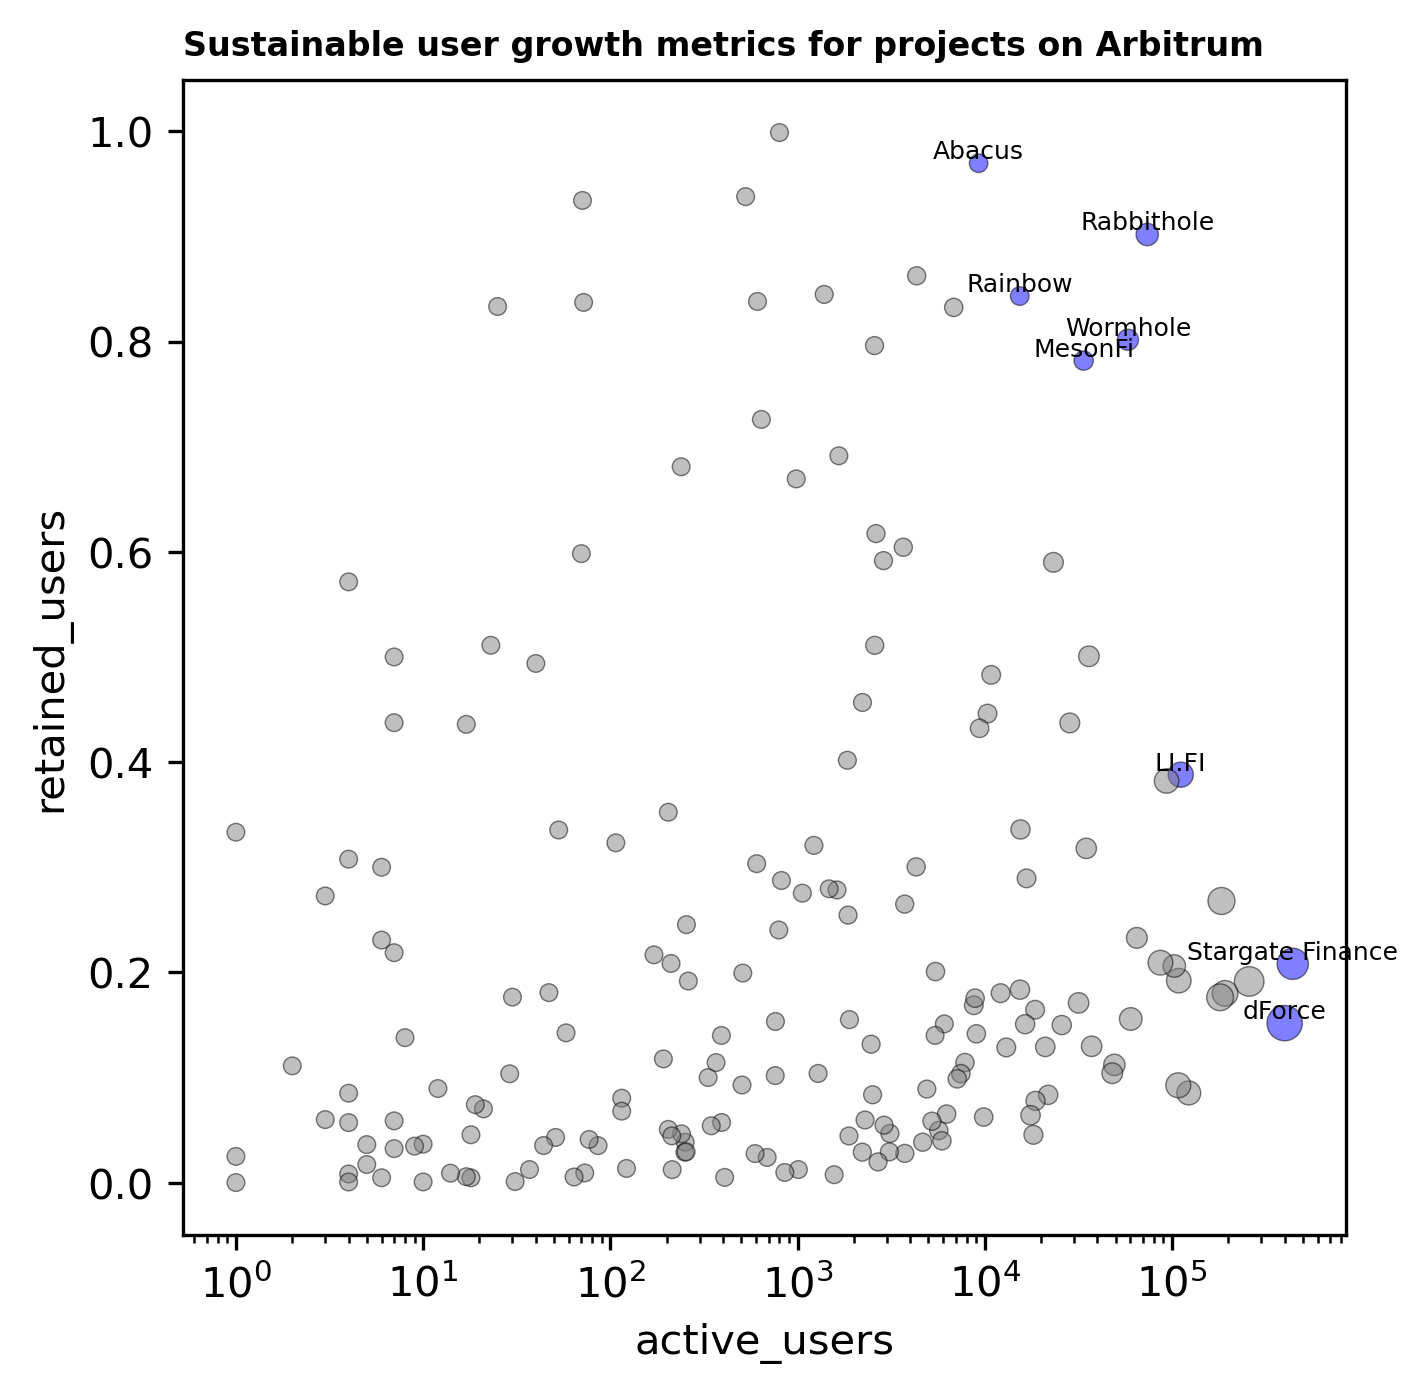

In [15]:
scatterplot(
    dataframe = users_pool.dropna(),
    x = 'active_users',
    y = 'retained_users',
    size = 'multi_project_users',
    title = 'Sustainable user growth metrics for projects on Arbitrum',
    logs=['x']
)

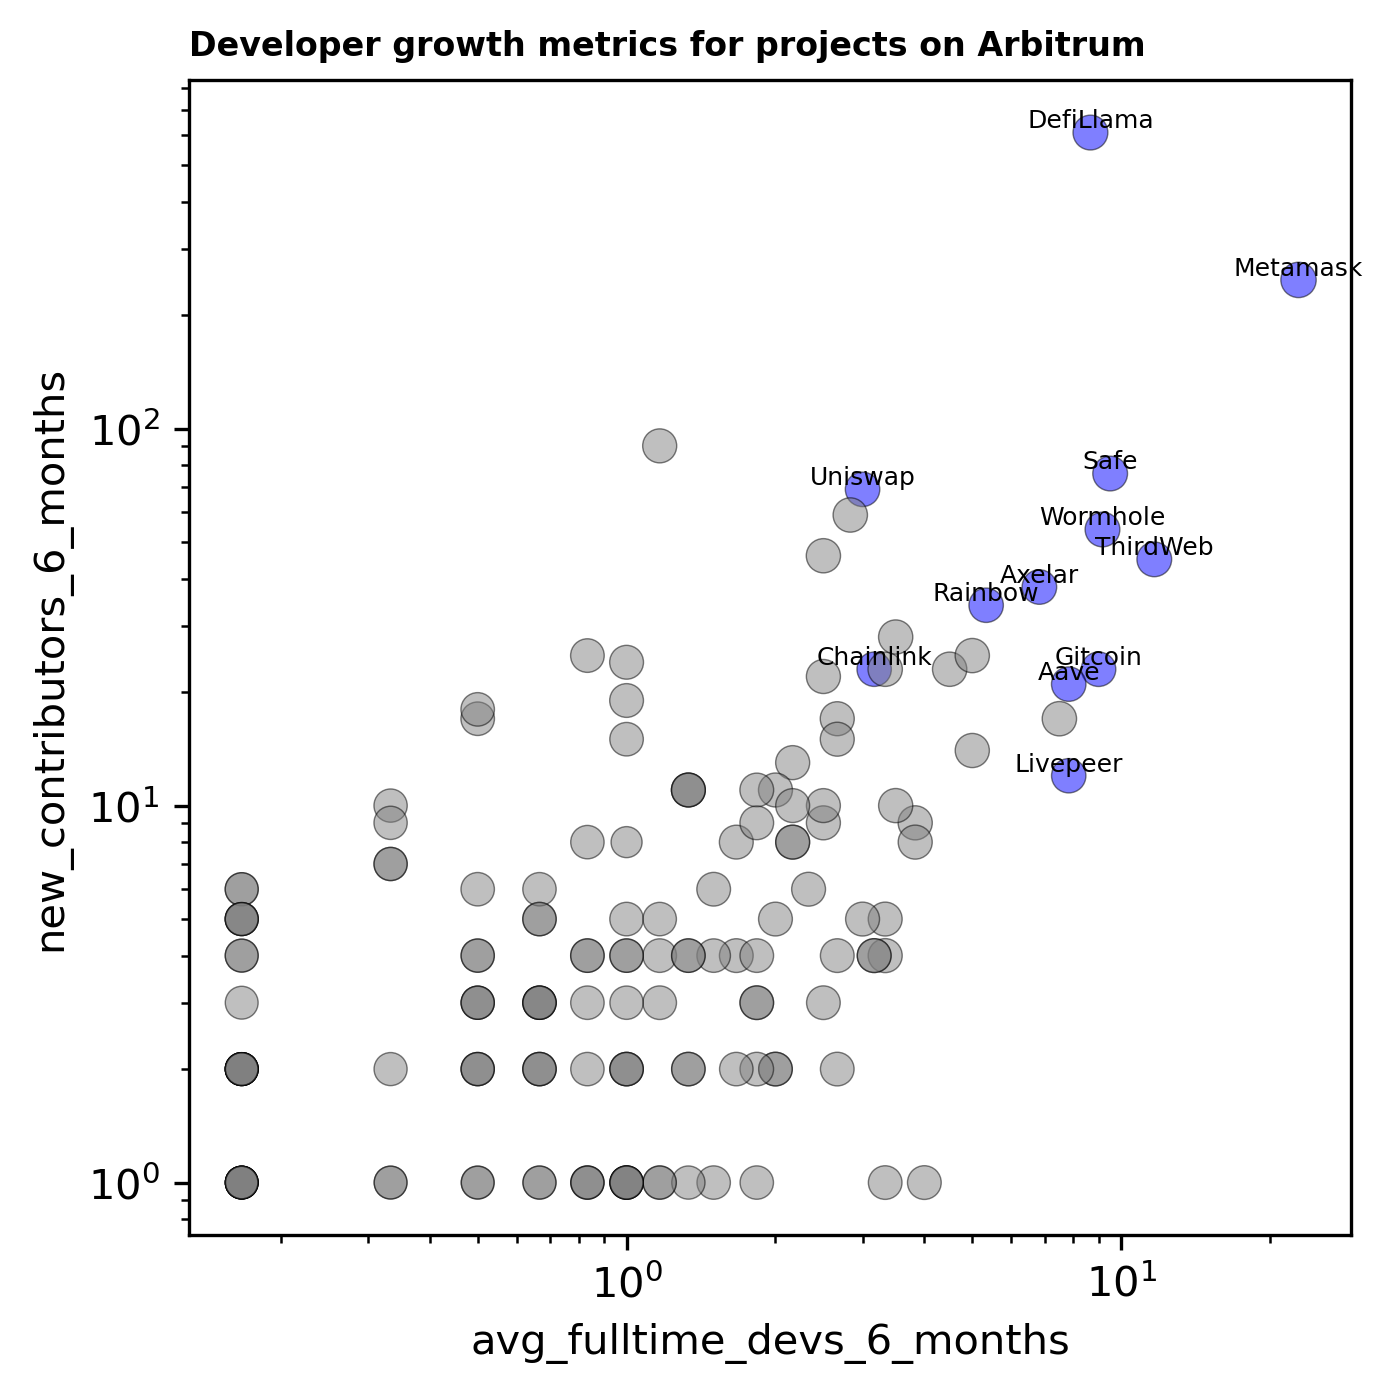

In [16]:
scatterplot(
    dataframe = dev_growth_pool.dropna(),
    x = 'avg_fulltime_devs_6_months',
    y = 'new_contributors_6_months',
    size = 'pool_score',
    title = 'Developer growth metrics for projects on Arbitrum',
    cap=12
)

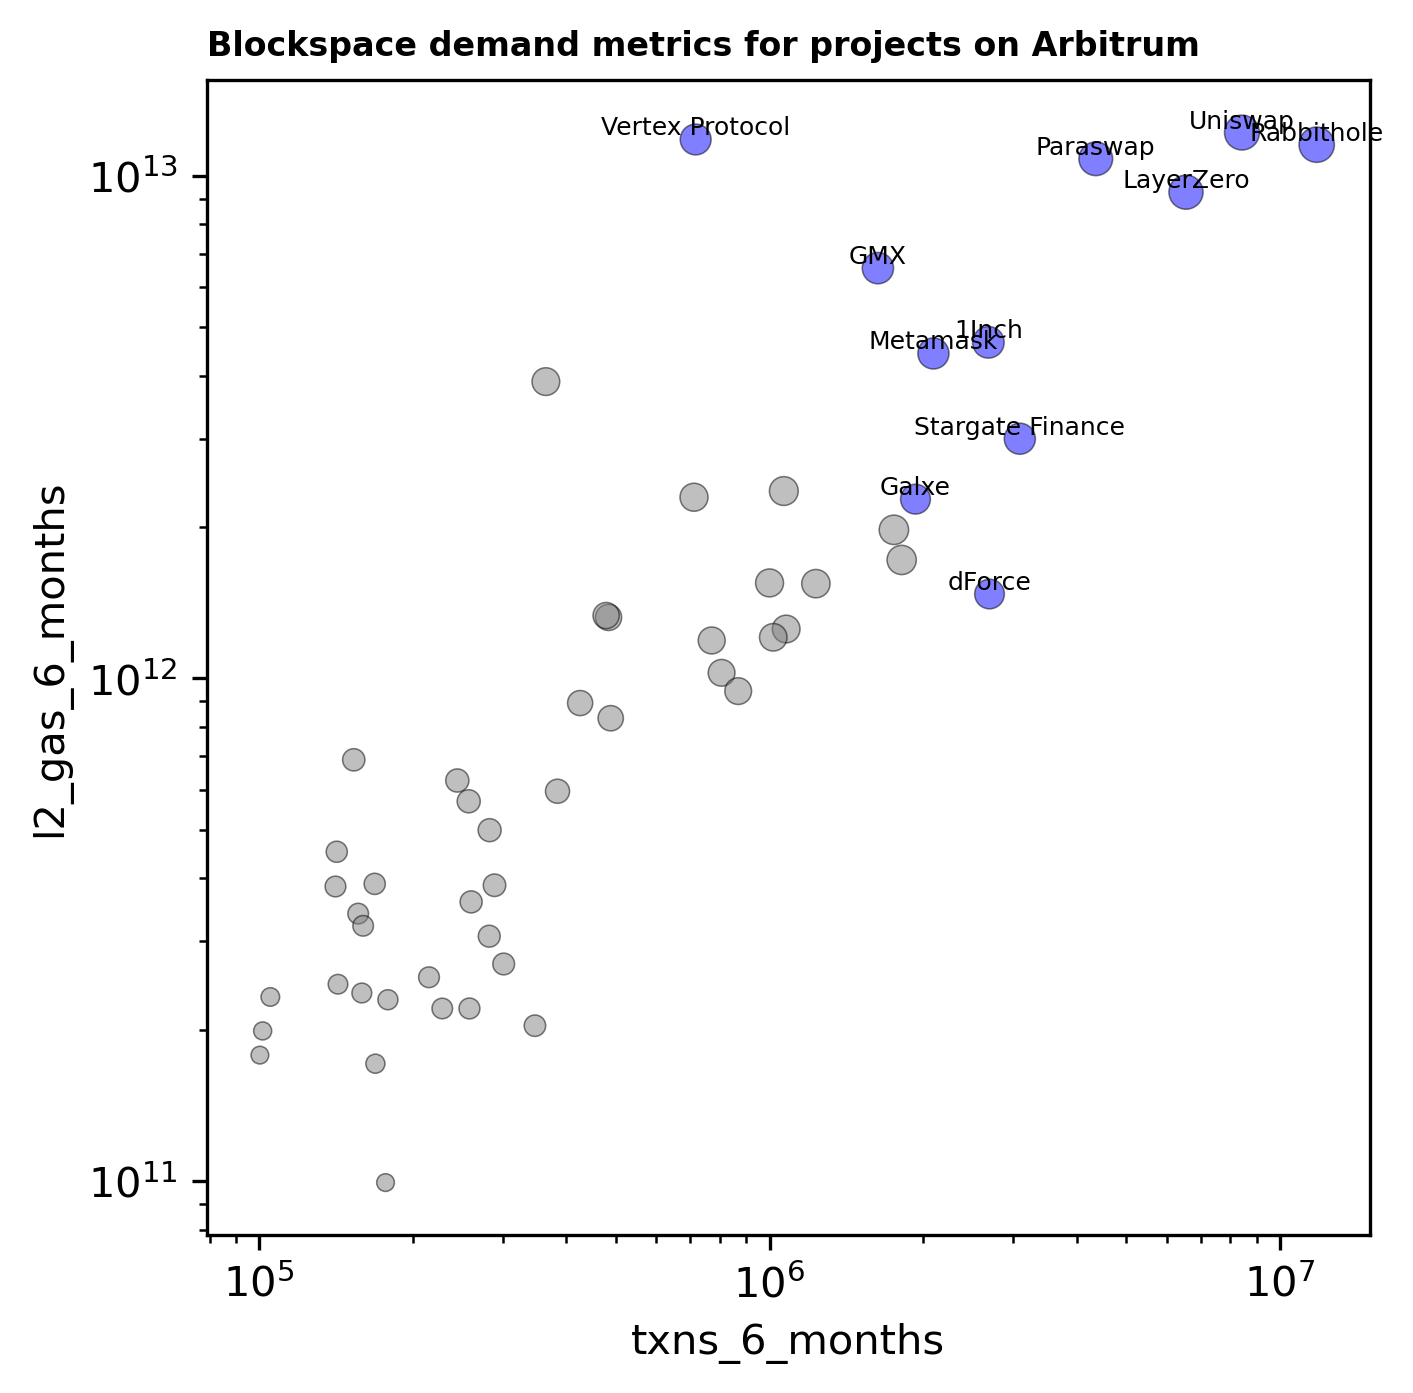

In [17]:
scatterplot(
    dataframe = blockspace_pool[blockspace_pool['txns_6_months']>100_000],
    x = 'txns_6_months',
    y = 'l2_gas_6_months',
    size = 'pool_score',
    title = 'Blockspace demand metrics for projects on Arbitrum',
    cap=11
)

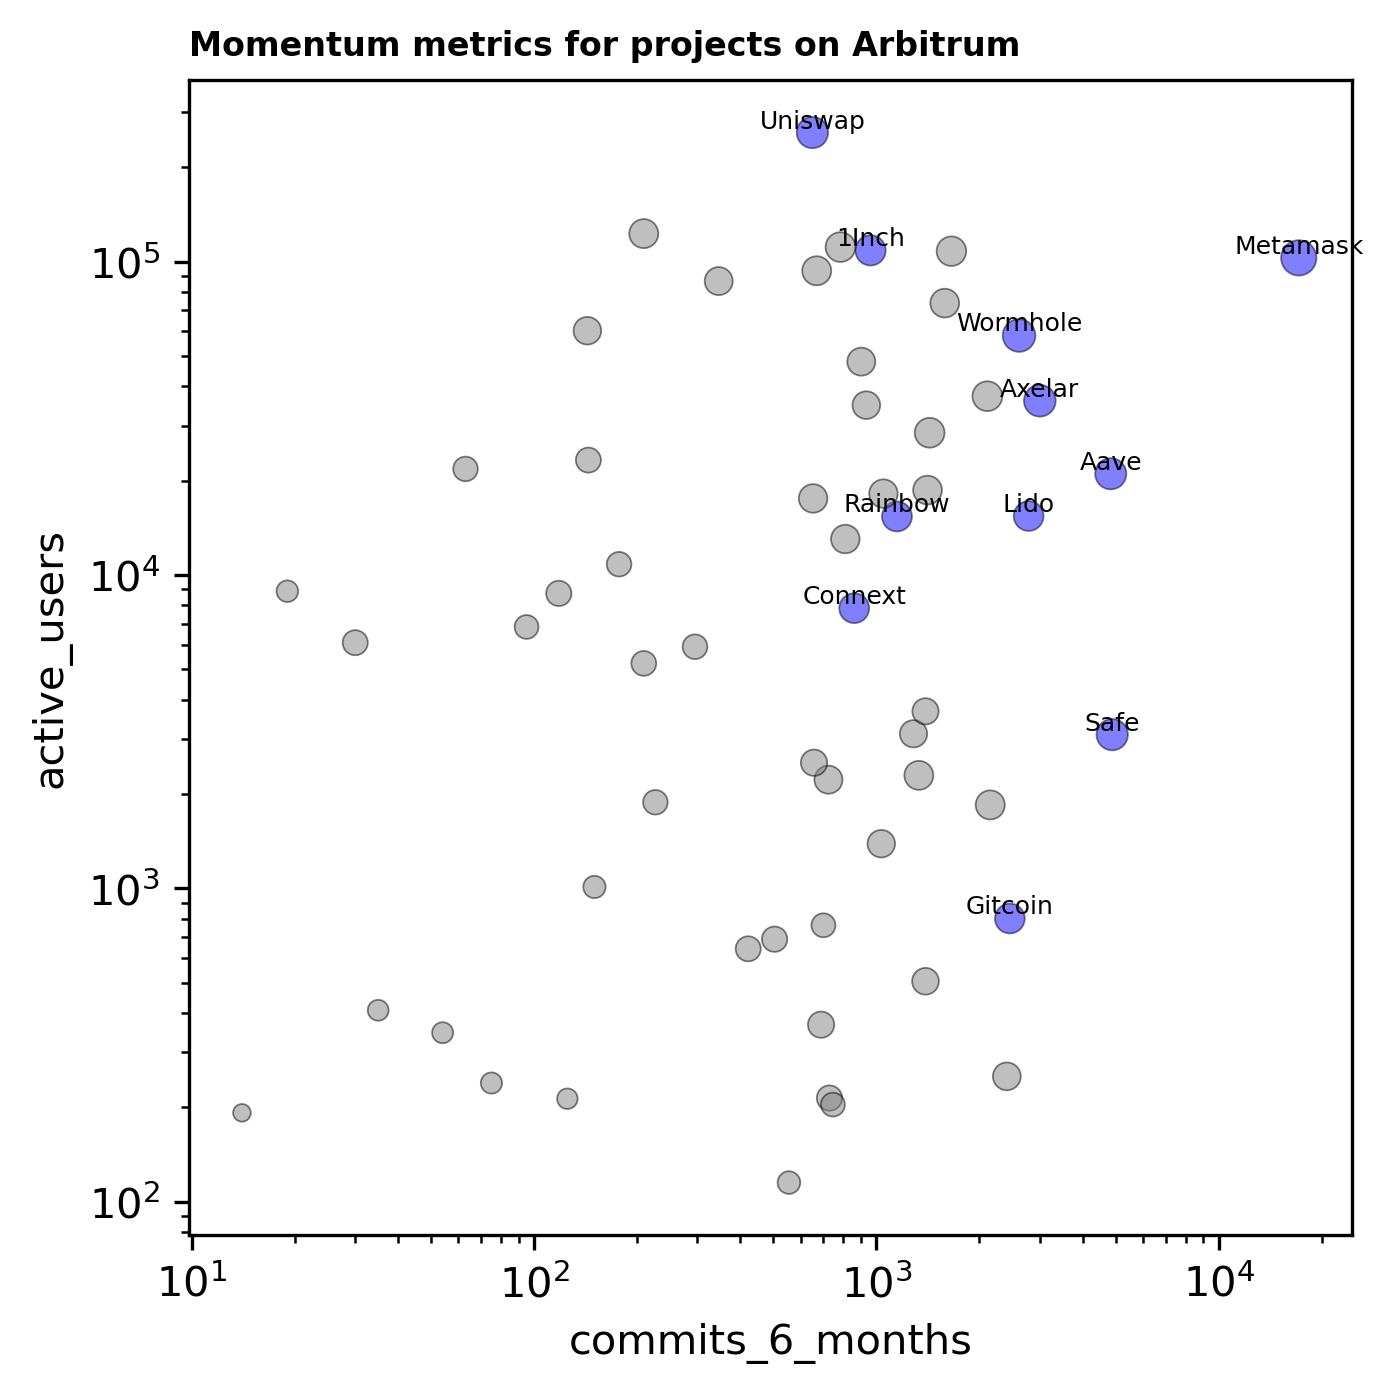

In [18]:
scatterplot(
    dataframe = momentum_pool[momentum_pool['active_users']>100],
    x = 'commits_6_months',
    y = 'active_users',
    size = 'pool_score',
    title = 'Momentum metrics for projects on Arbitrum',
    cap=11
)